In [ ]:
# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定

LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 512
MOMENTUM = [0.5, 0.9, 1.5]

In [9]:

results = {}
for name in ['SGD', 'RMSprop', 'AdaGrad', 'Adam']:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with optimizer: {name}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    if name == 'SGD':
        optimizer = keras.optimizers.SGD()
    elif name == 'RMSprop':
        optimizer = keras.optimizers.RMSprop()
    elif name == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad()
    else:
        optimizer = keras.optimizers.Adam()
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test))
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-optimizer-{name}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with optimizer: SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epo

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 260us/step - loss: 2.0104 - acc: 0.2733 - val_loss: 1.8148 - val_acc: 0.3539
Epoch 2/10
50000/50000 [==============================] - 12s 235us/step - loss: 1.7756 - acc: 0.3640 - val_loss: 1.7038 - val_acc: 0.3946
Epoch 3/10
50000/50000 [==============================] - 12s 239us/step - loss: 1.6798 - acc: 0.3988 - val_loss: 1.6313 - val_acc: 0.4294
Epoch 4/10
50000/50000 [==============================] - 12s 236us/step - loss: 1.6197 - acc: 0.4232 - val_loss: 1.5888 - val_acc: 0.4312
Epoch 5/10
50000/50000 [==============================] - 12s 230us/step - loss: 1.5482 - acc: 0.4502 - val_loss: 1.5238 - val_acc: 0.4618
Epoch 6/10
50000/50000 [==============================] - 12s 232us/step - loss: 1.5073 - acc: 0.4627 - val_loss: 1.5331 - val_acc: 0.4527
Epoch 7/10
50000/50000 [==============================] - 12s 232us/step - loss: 1.4746 - acc: 0.4751 - val_loss: 1.

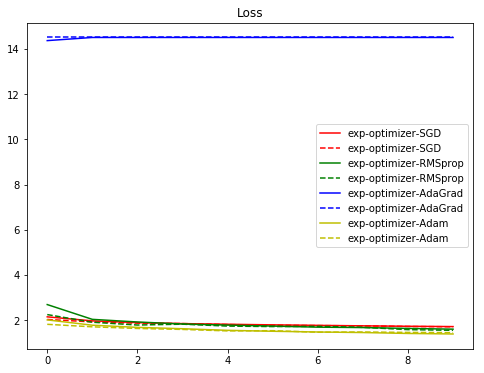

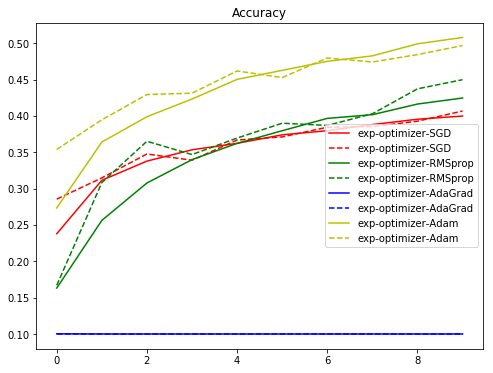

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
